<a href="https://colab.research.google.com/github/rgaguiar/rgaguiar/blob/main/analise_dados_textuais_CPI_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados textuais do relatório final da CPI da COVID
por [Rafael Aguiar](https://github.com/rgaguiar)

O relatório final da CPI da covid é um documento com as investigações e apurações de supostas omissões e irregularidades  nas ações do governo federal do presidente Jair Bolsonaro (sem partido) durante a pandemia de covid-19 no Brasil.  
Aqui iremos analisar:
* Quais são os sentimentos/palavras mais citadas no relatório?
* Quais os termos mais relevantes no documento?
* Quais são as palavras que mais ocorrem juntas? Co-Ocorrência ***

In [1]:
# instalando a biblioteca para leitura do pdf
!pip install pymupdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 5.3 MB/s 


In [2]:
# Importação das bibliotecas utilizadas
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import string
import re
from nltk.corpus import words

In [3]:
# importando o arquivo que sera analisado
from google.colab import files
uploaded = files.upload()

Saving relatorio-final-renan-calheiros-cpi.pdf to relatorio-final-renan-calheiros-cpi.pdf


O relatório foi extraído do site do senado, que pode ser acessado publicamente no [link](https://static.poder360.com.br/2021/10/relatorio-final-renan-calheiros-cpi.pdf). Após realizar o download do documento, tratamos o pdf de tal forma que possamos fazer uso de técnicas de processamento de linguagem natural (NPL), tais como:

* Tratamento do PDF
* Remoção das pontuações
* Tokenização
* Contagem de palavras no documento
* Remoção de stopwords
* Distribuição de frequência das palavras
* Wordcloud do relatório



# Tratamento do PDF

In [4]:
# lendo o pdf
import fitz
with fitz.open("relatorio-final-renan-calheiros-cpi.pdf") as pdf:
    texto = ""
    for pagina in pdf:
        texto += pagina.get_text()

In [5]:
# removendo o caractere \n
texto_str = texto.rstrip()

#ajustando os espacos
texto_str = texto.replace('\n', ' ')

# texto em minusculo
texto_str = texto_str.lower()

# Removendo pontuações do documento
Após realizar o tratamento do PDF, iremos começar a limpeza do texto. Para isso, será retirado toda pontuação desnecessária.

In [21]:
# remoção da pontuação
text_sem_pontuacao = ''.join([p for p in texto_str if p not in string.punctuation ])

# \w remove caractere alfanumerico
# \s remove com caracter único de espaço em branco (espaço, nova linha, retorno, tab, from)
# \d remove Encontra dígitos [0-9]

frase_limpa = re.sub(r'[^\w\s\d]','', text_sem_pontuacao) 

# Tokenização do documento
Agora o texto será separado em palavras únicas, para que seja possível calcular a quantidade de palavras, frequência das palavras e verificação de stopwords.


In [9]:
# tokenização
nltk.download('punkt')
tokenizacao_palavras = nltk.word_tokenize(frase_limpa)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Quantidade de Palavras

In [24]:
print(f'O relatório possui {len(set(tokenizacao_palavras))} palavras')

O relatório possui 23547 palavras


# Remoção de stopwords
Aqui será realizado o download das stopwords em português. As stopwords são palavras que quando retiradas de um texto o sentido não é alterado, por isso iremos removê-las do texto, para trabalhar com uma base menor.  
Primeiramente, vamos acrescentar mais palavras as stopwords padrão antes de fazer a remoção de fato das stopwords. 

In [11]:
# remoção das Stopwords
nltk.download('stopwords')
stopwords = stopwords.words("portuguese")
stop_words = ['sobre', 'sr', 'ser', 'nº', 'ainda', 'r', 'uso', 'dia', 'ter', 'qualquer', 
              'assim', 'então', 'porte', 'havia', 'porque', 'apenas', 'outras', 'disso', 
              'após', 'al', 'pode', 'disse', 'fez', 'nesse', 'desse', 'i', 'final', 'outro', 
              'total', 'sra', 'vez', 'aqui', '20', 'disse', 'sob', 'v', 'desde', '10', 'ii', 
              'dessas', 'diz', 'quanto', '00', '2º', 'mesma', 'pois', 'quais', 'cada', '15', 
              'todo', 'apartir', 'desta', 'deve', '3', 'outra', 'ms', '2'] + stopwords

palavras_sem_stop = [p for p in tokenizacao_palavras if p not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Verificando as palavras com mais frequência
Após realizar a limpeza do texto, é possível checar o número de aparições das principais palavras. A função *.most_common* da biblioteca *nltk* irá retornar as 20 palavras que mais aparecem no texto.

In [13]:
# verificando a frequencia das palavras (top 10)
fdist = FreqDist(palavras_sem_stop)
fdist.most_common(20)

[('saúde', 1643),
 ('ministério', 1009),
 ('2021', 916),
 ('art', 820),
 ('2020', 797),
 ('federal', 744),
 ('covid19', 706),
 ('pandemia', 686),
 ('presidente', 647),
 ('tratamento', 633),
 ('governo', 566),
 ('lei', 533),
 ('brasil', 524),
 ('contra', 489),
 ('empresa', 472),
 ('cpi', 451),
 ('disponível', 426),
 ('precoce', 420),
 ('pessoas', 419),
 ('acesso', 394)]

Plot da distribuição das 20 palavras mais frequentes (geradas em fdist.plot()):

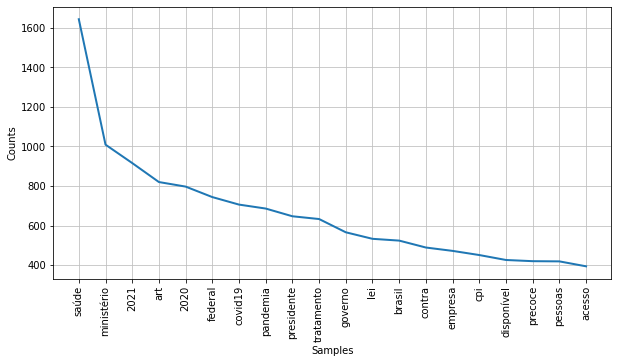

In [16]:
# Grafico de distribuicao das palavras
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
fdist.plot(20,cumulative=False);

# Gerando a wordcloud do relatório

Plot da nuvem de palavras:

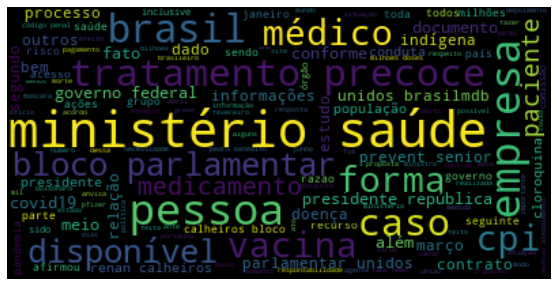

In [17]:
# Wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(palavras_sem_stop))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
img.to_file('worcloud.jpeg');

Podemos ver no nosso *wordcloud* que os termos mais usados no relatório final da CPI da COVID-19 foram:  tratamento, precoce, ministério, saúde, vacina, empresa, médico, CPI, dentre outros. 

Esse projeto é uma pequena aplicação do que pode ser feito com uso de técnicas Processamento de Linguagem Natural - NPL (ou *NPL em inglês para Neural Processor Language*) usando as bibliotecas `NLTK` e `WordCloud`